In [692]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

kat=finesse.kat()
kat1=finesse.kat()
kat.verbose=True

Parsing `set err PDrefl re` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:23:45.977275


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.71833 seconds

--- Output info ---

Run date and time: 2022-10-14 22:23:45.982293
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.676754701984460e-13 max = 3.356816814770690e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


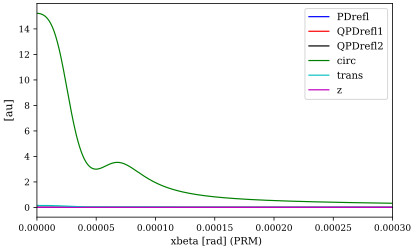

In [693]:
kat4 = finesse.kat()
kat4.verbose=True
kat4.parse("""

maxtem 3  
mod EOM 55.55M 0.001 3 pm nin n0                #modulator
l laser 30 0 nin                                   # input laser                  
              

s s0 0 n0 n1

##### PRC ######
m PRM 0.759 0.01 90 n4 n5               
s scavity 1.350 n5 n6                   
m ITM 0.98997 0.01 0 n6 n7               
s s2 0.1 n3 n8  
################


##### QPDS ######
bs pickoff 0.1 0.9 0 45 n1 dump n2 n3           #bs to split power between detectors and main cavity  ##Setup-> http://www.gwoptics.org/finesse/examples/autoalignment.php ##
s s1 0.1 n2 n4                    
bs bsQPD 0.5 0.5 0 45 n8 n9 n10 dump            #bs to split power between two detectors 

s sQPD1 0.1 n9 n11                   
s sQPD2 0.1 n10 n12  

attr s2 g 10                                   #guoy phase for det1
attr sQPD1 g 40                                 #guoy phase for det1
attr sQPD2 g 130                                #guoy phase for det2
##### QPDS ######


cav cavity PRM n5 ITM n6 
trace 2                  

###### attr ##########
attr PRM Rc -23.6                
attr ITM xbeta 0  
attr PRM xbeta 0         
#####################

#### PDs############
pd1 PDrefl 166.65M 70 n4                           # refl
pd1 QPDrefl1 166.65M 90 n11                       #Split detector1 refl
pdtype QPDrefl1 x-split   
pd1 QPDrefl2 166.65M 90 n12                       #Split detector2 refl
pdtype QPDrefl2 x-split   

pd circ n5                                      #circ power#
pd trans n7
##################


                                                ### cavity lock ###
set err PDrefl re    
lock z $err 3000 1n 
put PRM phi $z       
noplot z  


xaxis PRM xbeta lin 0 0.3m 800 
""")
out3 = kat4.run()
out3.info()
out3.plot()


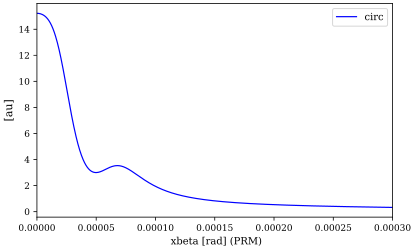

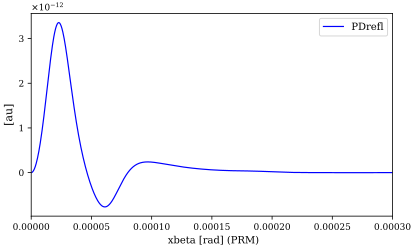

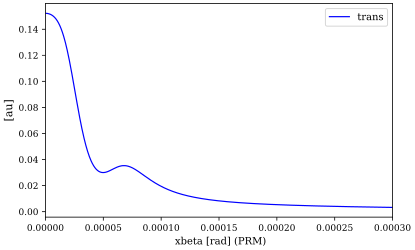

In [694]:
out3.plot(['circ'])
out3.plot(['PDrefl'])
out3.plot(['trans'])

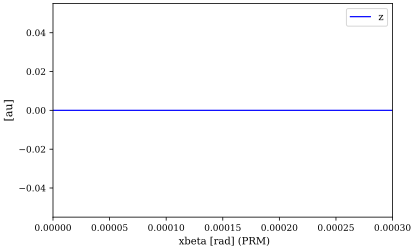

In [695]:
out3.plot(['z'])

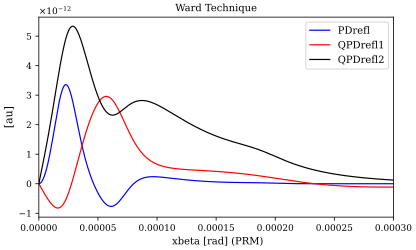

In [696]:
out3.plot(['QPDrefl1','QPDrefl2','PDrefl'],title='Ward Technique')

--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:34:39.626481


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 2.71202 seconds

--- Output info ---

Run date and time: 2022-10-14 22:34:39.628617
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.372506949061599e-11 max = 2.063833366350440e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


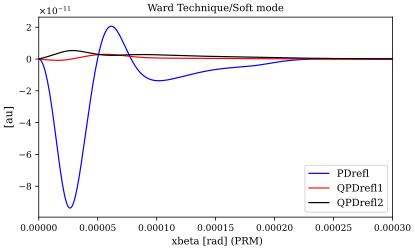

0
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:34:42.936238


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 2.97557 seconds

--- Output info ---

Run date and time: 2022-10-14 22:34:42.936237
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.305786904899100e-11 max = 2.048984481531890e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


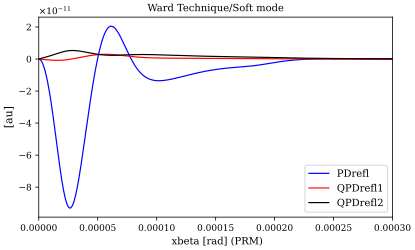

1
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:34:46.370103


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.93866 seconds

--- Output info ---

Run date and time: 2022-10-14 22:34:46.370102
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.236232227898180e-11 max = 2.033511456191300e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


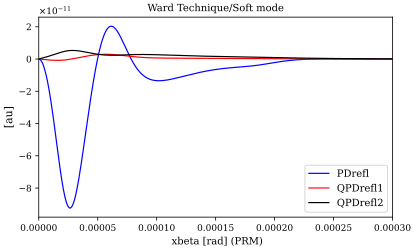

2
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:34:48.758701


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.70757 seconds

--- Output info ---

Run date and time: 2022-10-14 22:34:48.758701
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.163864105087250e-11 max = 2.017419003562090e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


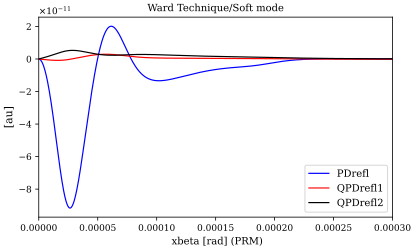

3
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:34:50.897201


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.63152 seconds

--- Output info ---

Run date and time: 2022-10-14 22:34:50.897201
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.088704580497570e-11 max = 2.000712025561220e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


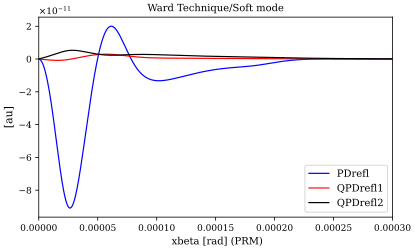

4
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:34:52.883435


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.58754 seconds

--- Output info ---

Run date and time: 2022-10-14 22:34:52.883435
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.010776548448420e-11 max = 1.983395611296030e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


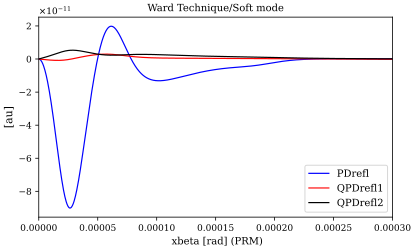

5
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:34:54.806998


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.45253 seconds

--- Output info ---

Run date and time: 2022-10-14 22:34:54.806998
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.930103746573250e-11 max = 1.965475035514060e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


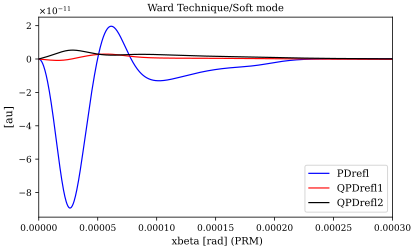

6
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:34:56.642577


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.47596 seconds

--- Output info ---

Run date and time: 2022-10-14 22:34:56.643558
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.846710748589021e-11 max = 1.946955756996280e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


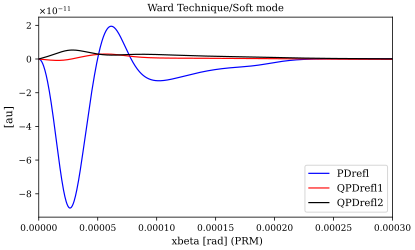

7
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:34:58.815068


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.43346 seconds

--- Output info ---

Run date and time: 2022-10-14 22:34:58.816051
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.760622956810760e-11 max = 1.927843416894340e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


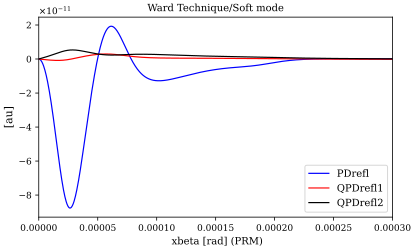

8
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:00.593812


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.45389 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:00.593811
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.671866594413790e-11 max = 1.908143837012170e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


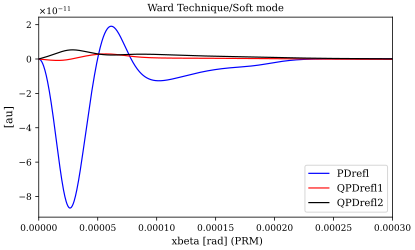

9
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:02.395845


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.41435 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:02.396845
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.580468697445900e-11 max = 1.887863018032640e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


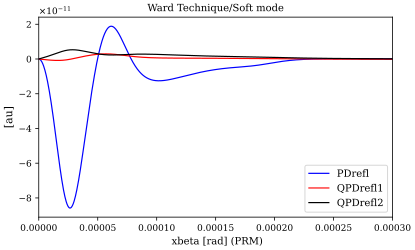

10
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:04.160660


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.49631 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:04.161669
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.486457106591910e-11 max = 1.867007137689690e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


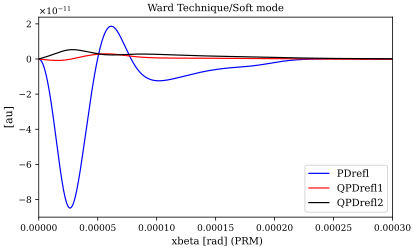

11
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:05.998578


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.44353 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:05.998577
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.389860458693100e-11 max = 1.845582548886480e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


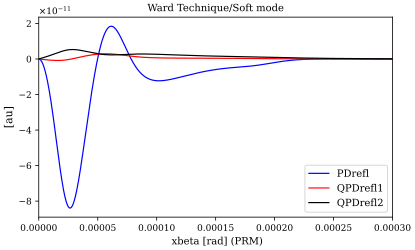

12
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:07.780153


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.42193 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:07.780152
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.290708178024161e-11 max = 1.823595777760330e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


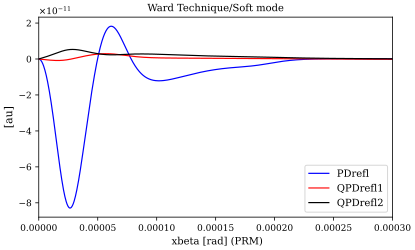

13
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:09.545818


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.4313 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:09.545817
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.189030467330300e-11 max = 1.801053521694700e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


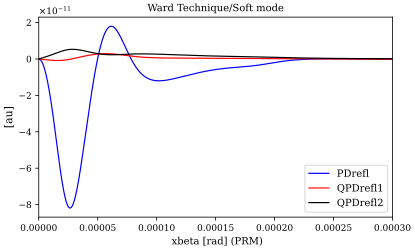

14
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:11.314230


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.53811 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:11.314230
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.084858298627170e-11 max = 1.777962647279170e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


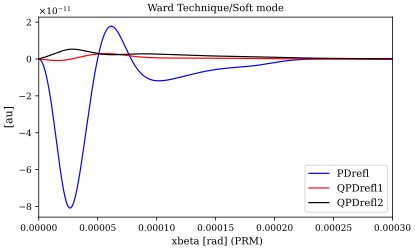

15
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:13.193441


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.4004 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:13.193440
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.978223403766500e-11 max = 1.754330188217760e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


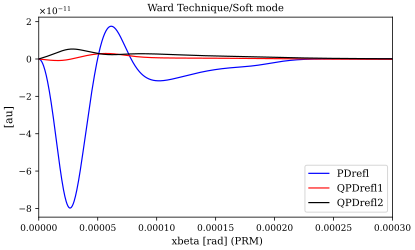

16
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:14.941623


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.43295 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:14.941623
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.869158264770261e-11 max = 1.730163343186450e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


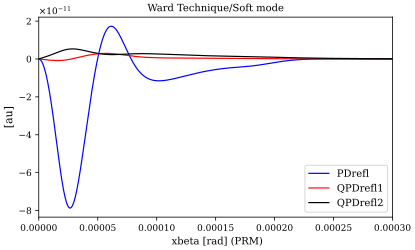

17
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:16.719860


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.46712 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:16.720482
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.757696103936320e-11 max = 1.705469473640330e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


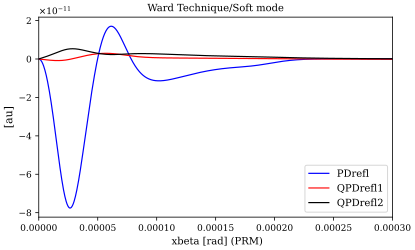

18
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:18.551409


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.43841 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:18.552407
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.643870873718640e-11 max = 1.680256101571290e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


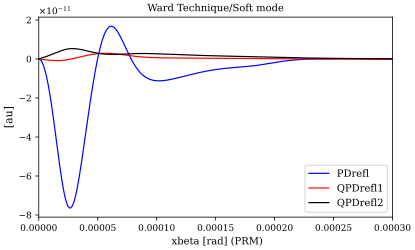

19
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:20.707004


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.45184 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:20.707004
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.527717246384979e-11 max = 1.654530907216700e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


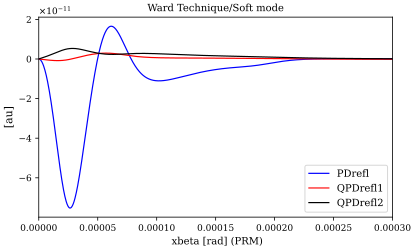

20
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:22.505813


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.49755 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:22.505812
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.409270603455430e-11 max = 1.628301726719980e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


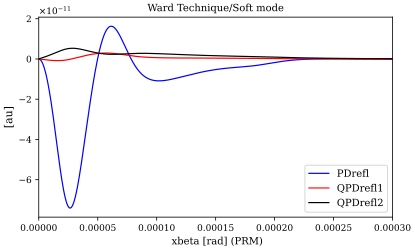

21
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:24.347389


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.40451 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:24.347389
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.288567024924860e-11 max = 1.601576549743580e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


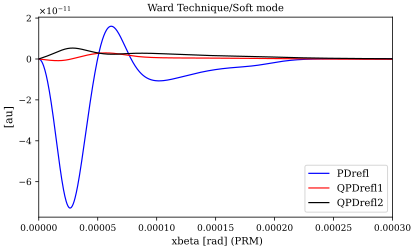

22
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:26.080363


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.38721 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:26.081367
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.165643278272560e-11 max = 1.574363517035310e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


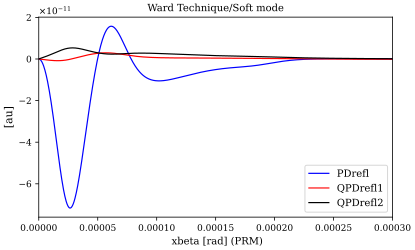

23
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:27.830548


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.40664 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:27.830547
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.040536807262550e-11 max = 1.546670917948550e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


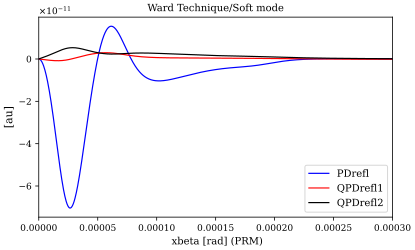

24
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:29.544204


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.59895 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:29.545203
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -6.913285720537840e-11 max = 1.518507187917240e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


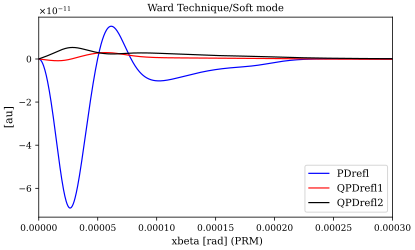

25
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:31.460824


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.49672 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:31.460823
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -6.783928780012150e-11 max = 1.489880905886390e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


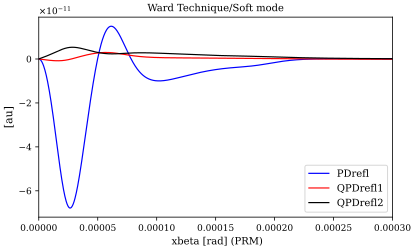

26
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:33.328286


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.52121 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:33.328286
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -6.652505389062680e-11 max = 1.460800791698800e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


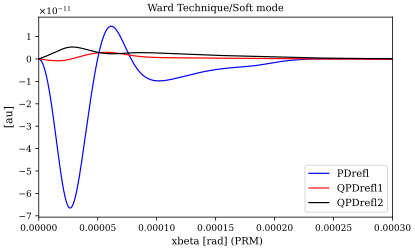

27
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:35.314306


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.60275 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:35.315307
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -6.519055580527430e-11 max = 1.431275703438960e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


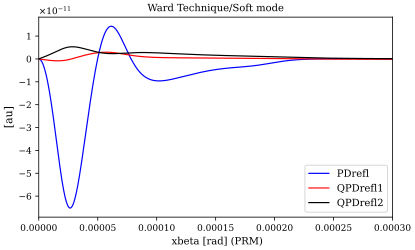

28
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:37.448529


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.72994 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:37.449563
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -6.383620004510839e-11 max = 1.401314634734780e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


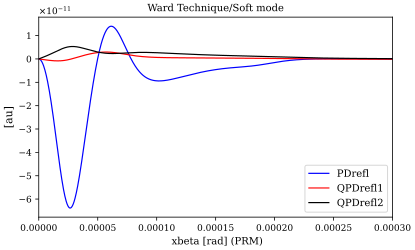

29
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:39.561654


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.54845 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:39.562697
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -6.246239916001370e-11 max = 1.370926712018020e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


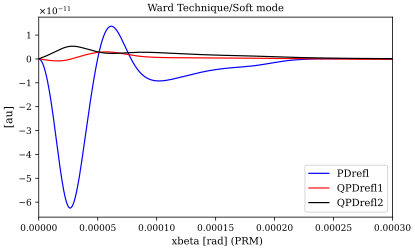

30
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:41.610992


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 2.03587 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:41.610992
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -6.106957162304790e-11 max = 1.340121191744310e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


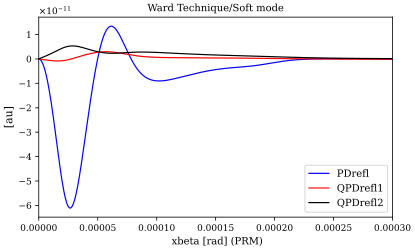

31
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:44.368728


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.45974 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:44.368728
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -5.965814170297150e-11 max = 1.308907457573550e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


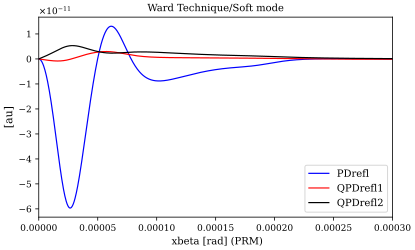

32
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:46.198434


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.50819 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:46.198433
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -5.822853933501110e-11 max = 1.277295017511550e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


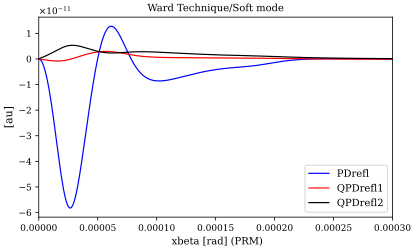

33
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:48.363452


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 2.1402 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:48.363452
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -5.678119998989660e-11 max = 1.245293501013770e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


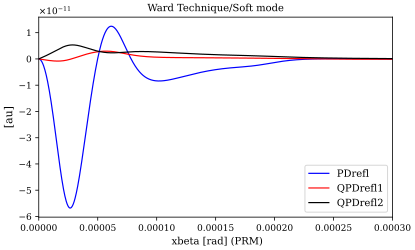

34
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:51.020361


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.54144 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:51.021354
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -5.531656454121340e-11 max = 1.212912656052160e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


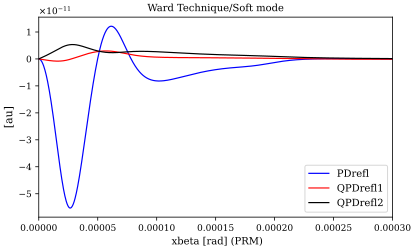

35
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:52.950984


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.40842 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:52.951989
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -5.383507913110730e-11 max = 1.180162346145770e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


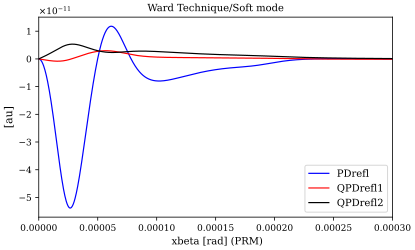

36
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:54.719529


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.51877 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:54.719529
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -5.233719503438580e-11 max = 1.147052547356240e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


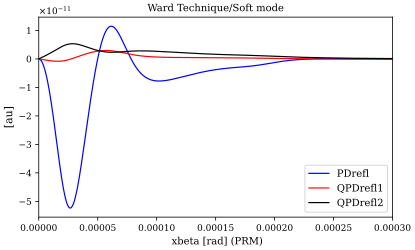

37
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:56.595121


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.39984 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:56.596120
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -5.082336852105500e-11 max = 1.113593345249050e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


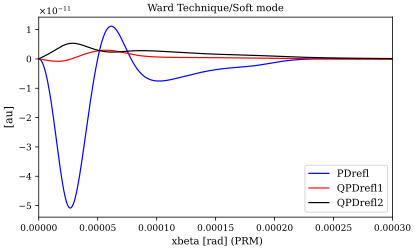

38
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:35:58.344245


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.42408 seconds

--- Output info ---

Run date and time: 2022-10-14 22:35:58.344245
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -4.929406071733570e-11 max = 1.079794931821280e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


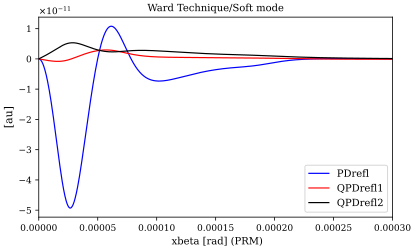

39
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:00.183000


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.44169 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:00.183000
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -4.774973746519960e-11 max = 1.045667602397060e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


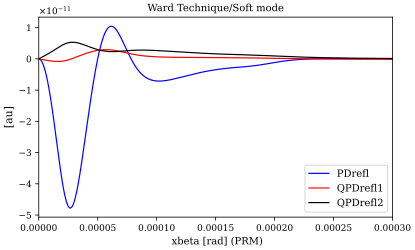

40
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:01.982515


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.52914 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:01.982515
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -4.619086918046950e-11 max = 1.011221752491540e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


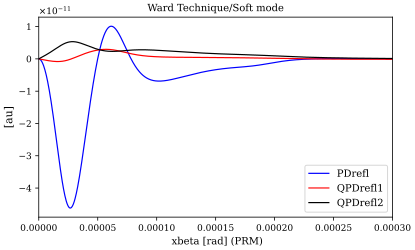

41
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:03.876532


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.48295 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:03.878035
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -4.461793070952600e-11 max = 9.764678746442891e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


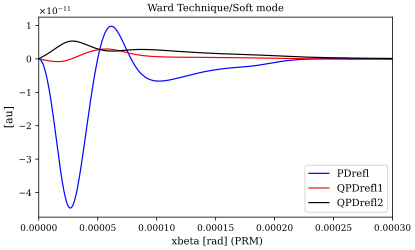

42
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:05.705023


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.44747 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:05.705023
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -4.303140118466480e-11 max = 9.414165552231650e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


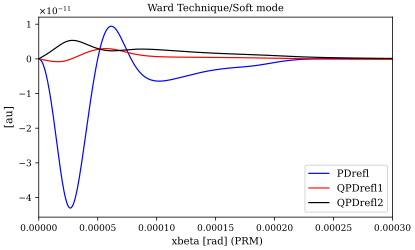

43
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:07.922965


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.71802 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:07.923951
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -4.143176387814820e-11 max = 9.060784711996120e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


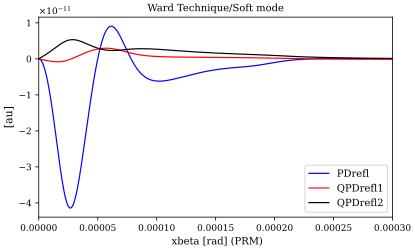

44
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:10.057107


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.44741 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:10.057106
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -3.981950605499590e-11 max = 8.704643868963529e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


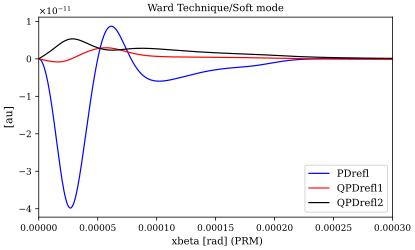

45
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:11.884715


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.51597 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:11.884714
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -3.819511882455890e-11 max = 8.345851507084670e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


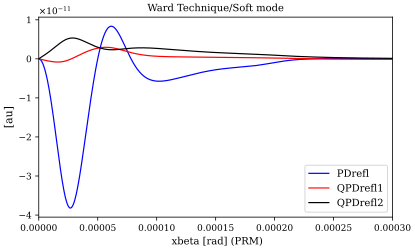

46
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:13.748399


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.44981 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:13.748922
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -3.655972911471920e-11 max = 7.984516917988680e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


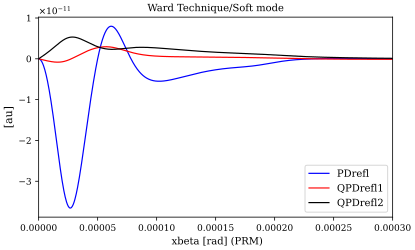

47
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:15.569168


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.46189 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:15.570177
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -3.491478181845410e-11 max = 7.620750167691710e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


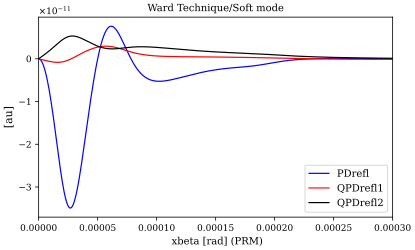

48
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:17.408004


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.43096 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:17.408004
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -3.325919914142000e-11 max = 7.254662063069800e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


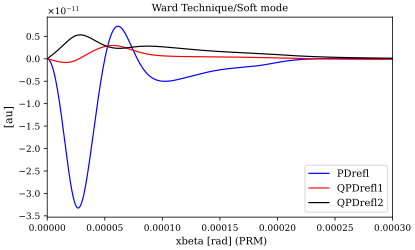

49
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:19.249484


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.48854 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:19.249483
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -3.159348539013840e-11 max = 6.886364118105990e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


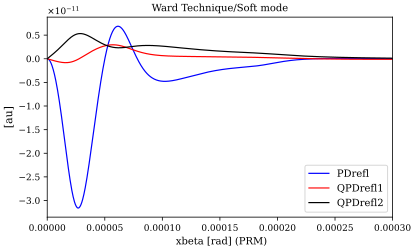

50
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:21.158911


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.53009 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:21.159924
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -2.991814795715390e-11 max = 6.515968519922100e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


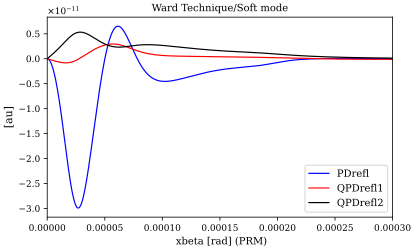

51
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:23.079077


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.52693 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:23.080077
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -2.823369716647810e-11 max = 6.143588094605440e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


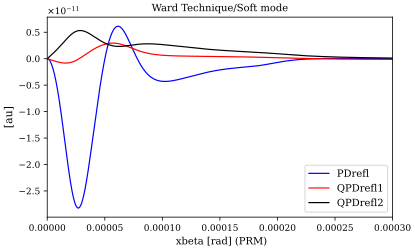

52
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:25.114043


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.59025 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:25.115045
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -2.654064611813950e-11 max = 5.769336272840880e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


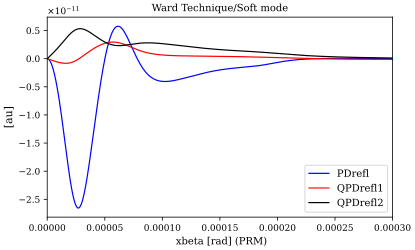

53
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:27.086545


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.70181 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:27.088263
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -2.483951053188820e-11 max = 5.393327055358800e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


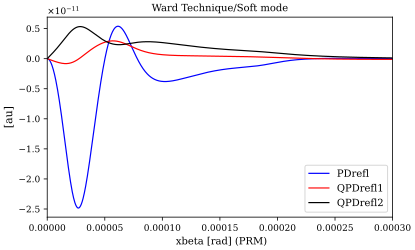

54
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:29.608657


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.48934 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:29.608657
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -2.313080859010320e-11 max = 5.015674978209330e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


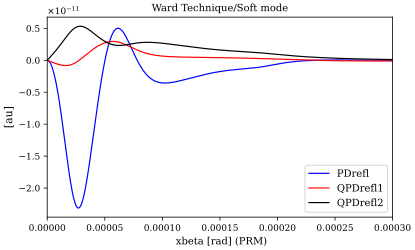

55
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:31.528157


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.43837 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:31.528156
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -2.141506077994840e-11 max = 4.636495077873560e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


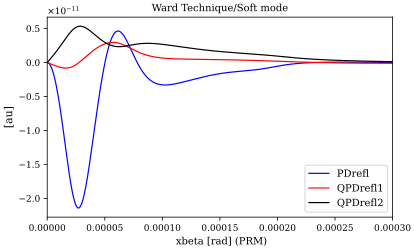

56
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:33.321581


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.46992 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:33.321581
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.969322563301240e-11 max = 4.255902856222330e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


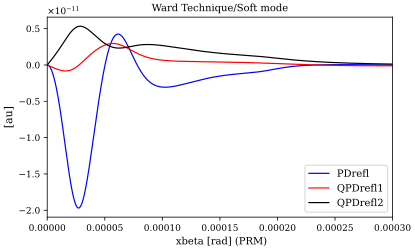

57
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:35.158377


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.43695 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:35.158376
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.796907946384300e-11 max = 3.874014245333240e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


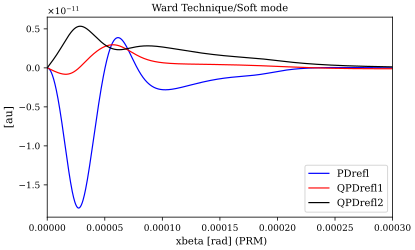

58
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:36.939198


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.45312 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:36.939198
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.623945973899840e-11 max = 3.490945572176610e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


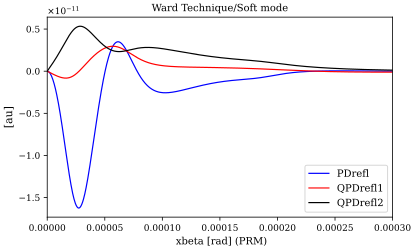

59
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:38.743810


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.39306 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:38.744807
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.450489331740230e-11 max = 3.106813523181140e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


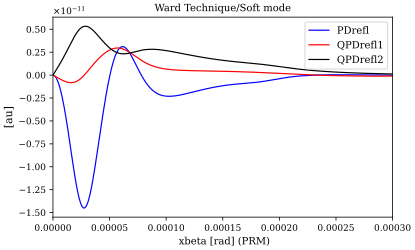

60
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:40.540709


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.47254 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:40.541701
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.276847544017420e-11 max = 2.721735108690130e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


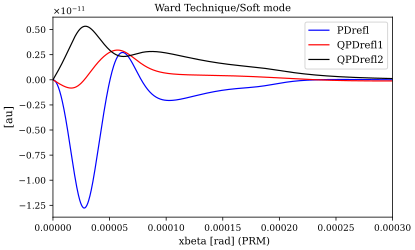

61
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:42.397926


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.47254 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:42.397926
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.103165534676710e-11 max = 2.335827627318980e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


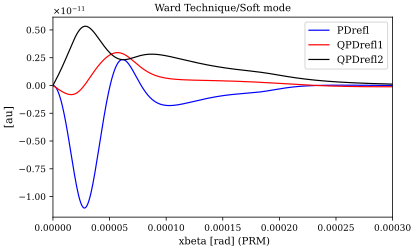

62
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:44.239333


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.66407 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:44.239332
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.295655161235270e-12 max = 1.949208630224870e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


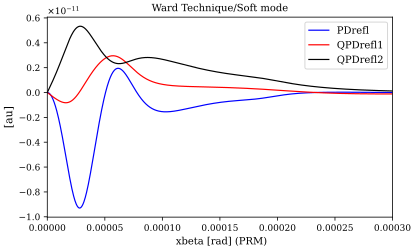

63
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:46.296696


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.46938 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:46.296696
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.564133508343890e-12 max = 1.561995885299580e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


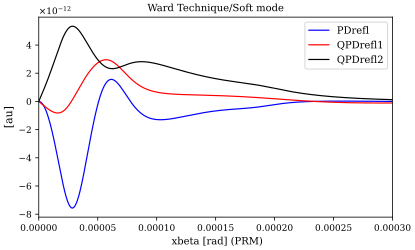

64
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:48.300735


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.60638 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:48.301736
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -5.843186875498190e-12 max = 1.174307341296250e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


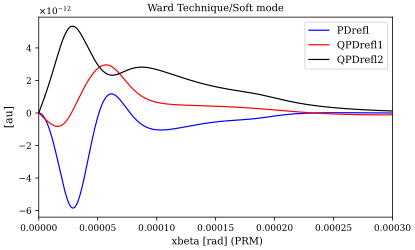

65
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:50.306862


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.49813 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:50.306862
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -4.149844602194810e-12 max = 7.862610919009760e-13
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


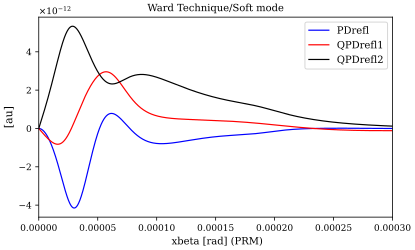

66
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:52.517941


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.44424 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:52.517941
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -2.521587777550470e-12 max = 3.983167648497810e-13
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


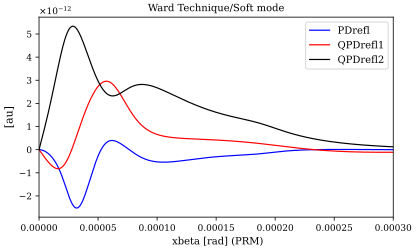

67
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:54.321757


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.43177 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:54.322762
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.079555577378110e-12 max = 3.508087624188960e-13
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


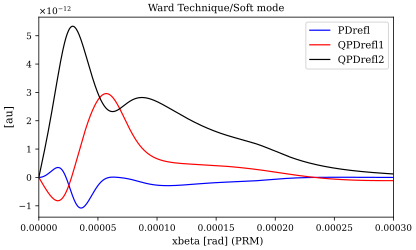

68
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:56.120395


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.4342 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:56.121387
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -3.800800189244940e-13 max = 1.735904541030420e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


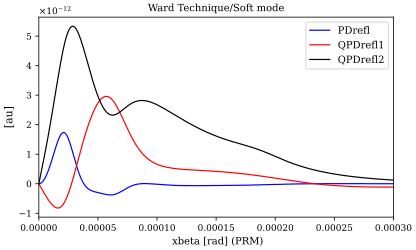

69
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:57.919594


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.40665 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:57.919593
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.676754701984460e-13 max = 3.356816814770690e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


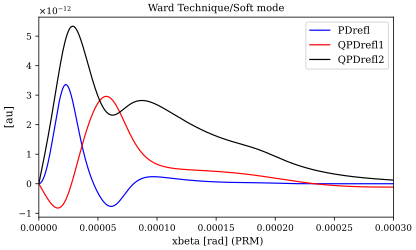

70
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:36:59.677869


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.48697 seconds

--- Output info ---

Run date and time: 2022-10-14 22:36:59.679339
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.155460649626870e-12 max = 5.049097053576510e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


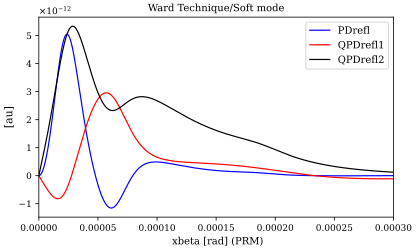

71
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:01.530631


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.47226 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:01.531632
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.542905780437760e-12 max = 6.770325273687440e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


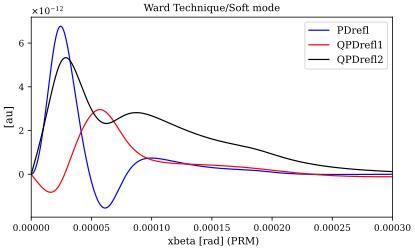

72
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:03.365915


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.48508 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:03.366918
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.930144730273370e-12 max = 8.502726807428890e-12
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


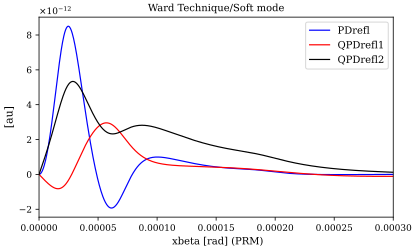

73
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:05.282042


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.81584 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:05.283045
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -2.316795739326410e-12 max = 1.023986472379490e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


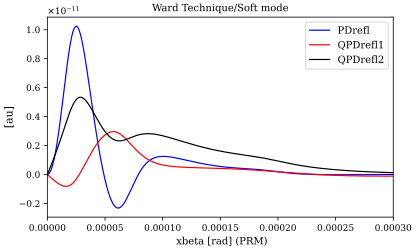

74
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:07.498117


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.63849 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:07.499132
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -2.702741029953940e-12 max = 1.197837275589610e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


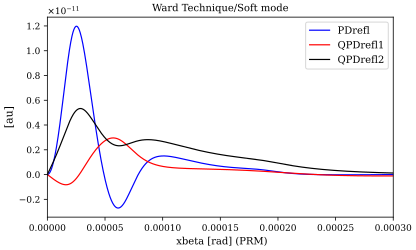

75
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:09.535136


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.84303 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:09.536133
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -3.087863039481710e-12 max = 1.371626490094370e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


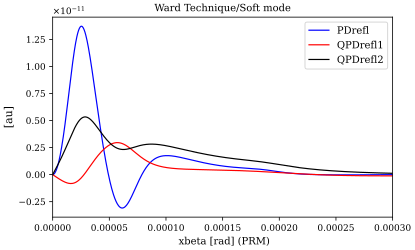

76
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:11.810148


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.75318 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:11.810147
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -3.472044456014850e-12 max = 1.545305371161010e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


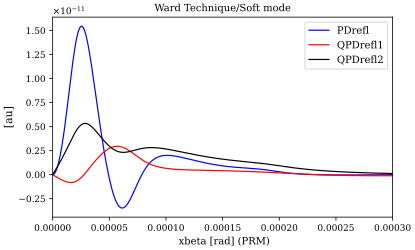

77
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:14.022076


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.49586 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:14.022076
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -3.855168254172240e-12 max = 1.718513537241880e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


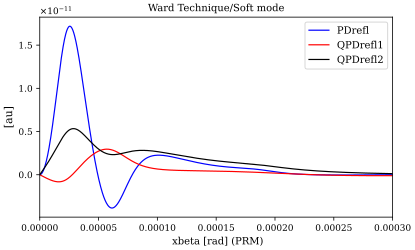

78
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:16.228043


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.43667 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:16.228043
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -4.237117730733550e-12 max = 1.891198227451690e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


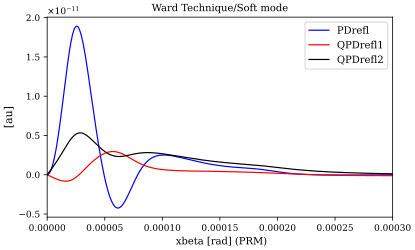

79
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:18.024236


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.41904 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:18.024236
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -4.617776540188210e-12 max = 2.063579218996340e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


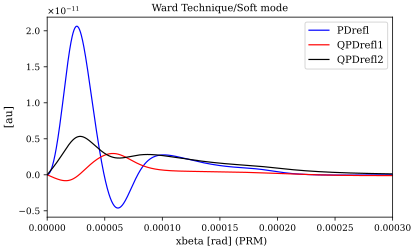

80
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:19.794173


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.43167 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:19.795152
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -4.997028730175310e-12 max = 2.235468638782650e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


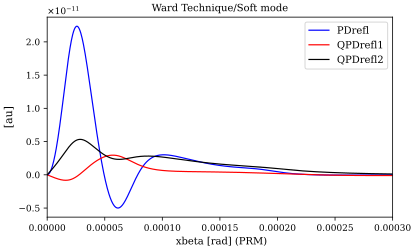

81
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:21.580614


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.41414 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:21.580614
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -5.374758776803900e-12 max = 2.406677113166120e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


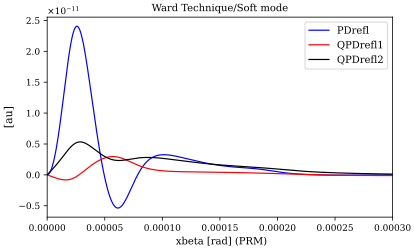

82
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:23.394433


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.57556 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:23.394433
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -5.750851619842620e-12 max = 2.577152490386920e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


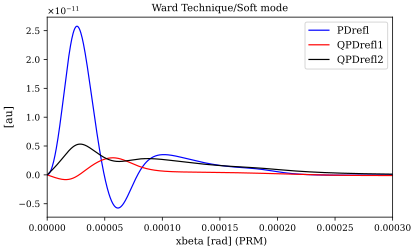

83
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:25.338821


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.56286 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:25.339820
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -6.125192697768180e-12 max = 2.746842841993710e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


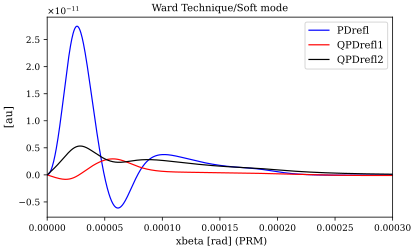

84
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:27.257069


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.4537 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:27.258062
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -6.497667982661930e-12 max = 2.915696478661560e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


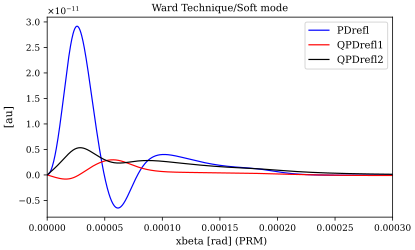

85
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:29.079813


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.40941 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:29.079812
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -6.868164014943840e-12 max = 3.083661965937020e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


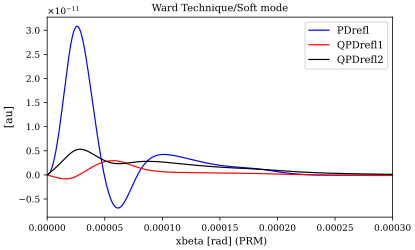

86
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:30.914130


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.51376 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:30.914129
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.236567937933390e-12 max = 3.250688139905560e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


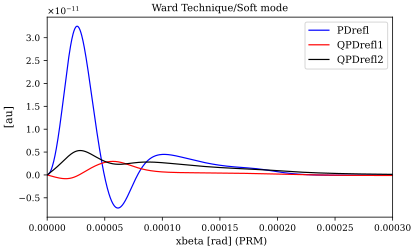

87
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:32.810425


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.57921 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:32.811424
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.602767532226840e-12 max = 3.416724122776550e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


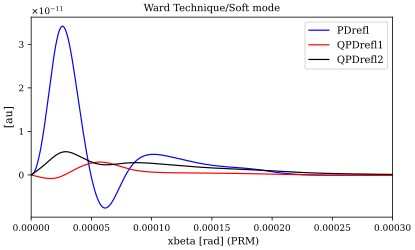

88
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:34.701934


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.448 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:34.701934
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -7.966651249880321e-12 max = 3.581719338381200e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


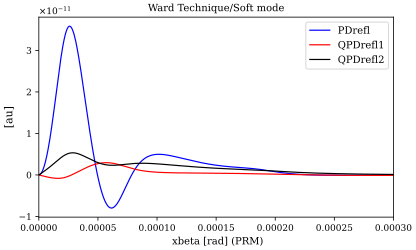

89
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:37.033845


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.65924 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:37.033844
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.328108248388400e-12 max = 3.745623527578490e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


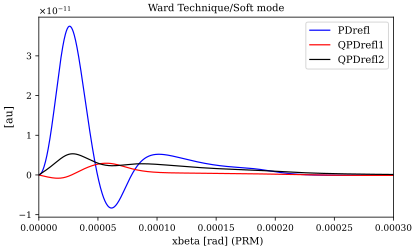

90
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:39.228021


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.71259 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:39.228021
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -8.687028424447820e-12 max = 3.908551255006850e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


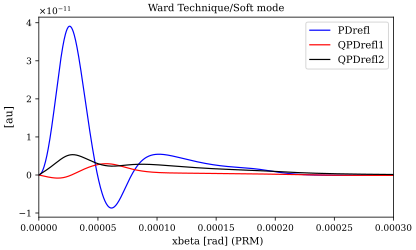

91
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:41.371154


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.50679 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:41.371154
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.043302447496020e-12 max = 4.070337436836110e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


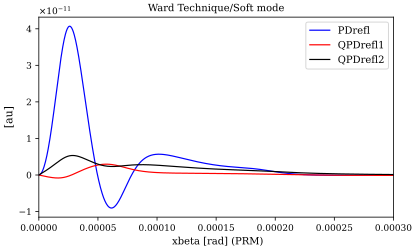

92
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:43.262290


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.48605 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:43.263294
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.396821793014281e-12 max = 4.230883754451860e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


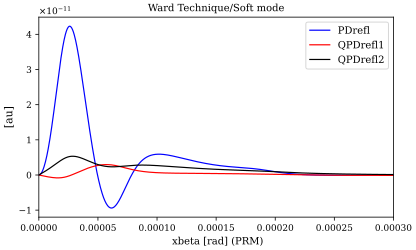

93
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:45.083094


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.48548 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:45.084092
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -9.747478775585320e-12 max = 4.390141303890520e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


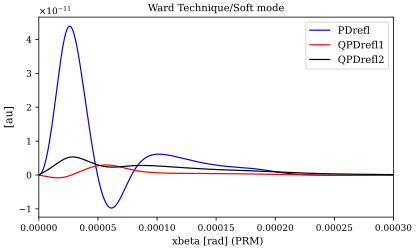

94
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:46.928052


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.52944 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:46.928051
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.009516658169540e-11 max = 4.548061573759760e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


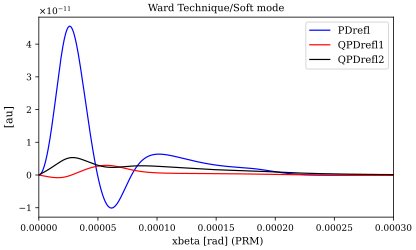

95
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:48.807896


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.50689 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:48.808410
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.043977930227060e-11 max = 4.704596460015570e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


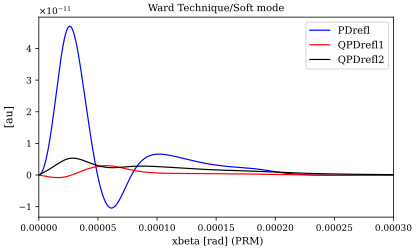

96
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:50.650103


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.53322 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:50.651096
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.078121196493790e-11 max = 4.859698280615200e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


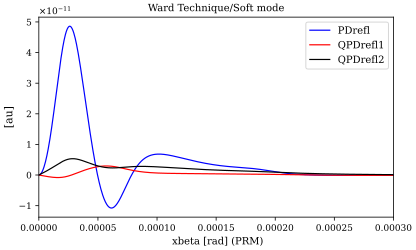

97
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:52.549494


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.45086 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:52.550496
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.111936056600070e-11 max = 5.013319790041610e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


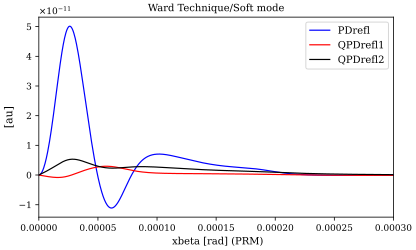

98
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:54.344999


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.57194 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:54.346002
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.145412210211950e-11 max = 5.165414193694850e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


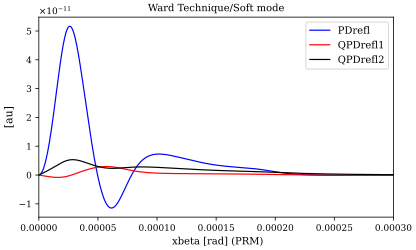

99
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:56.280415


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.47096 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:56.281416
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.178539460168740e-11 max = 5.315935162146210e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


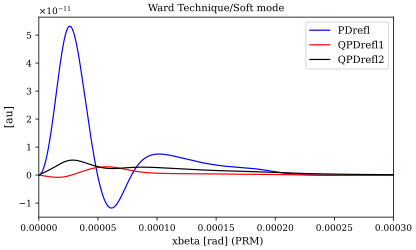

100
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:37:58.104640


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.44995 seconds

--- Output info ---

Run date and time: 2022-10-14 22:37:58.104640
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.211307715589200e-11 max = 5.464836845250550e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


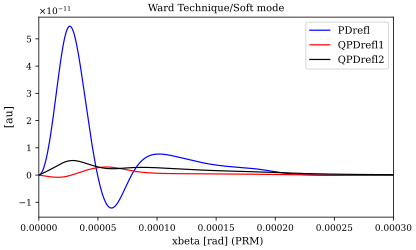

101
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:00.274843


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.4668 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:00.275848
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.243706994945280e-11 max = 5.612073886112760e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


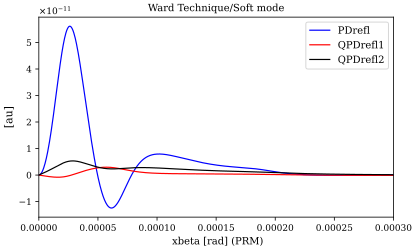

102
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:02.099451


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.45511 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:02.100444
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.275727429102650e-11 max = 5.757601434903890e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


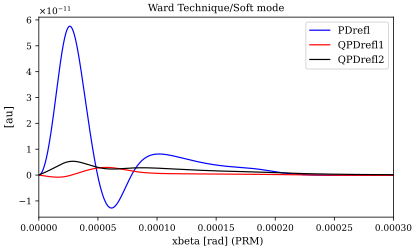

103
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:03.926638


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.46358 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:03.927637
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.307359264326860e-11 max = 5.901375162522810e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


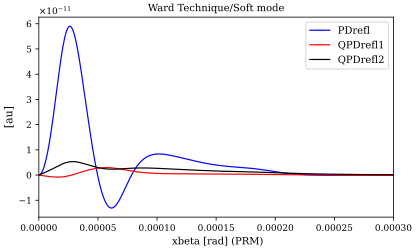

104
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:05.763043


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.67763 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:05.763042
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.338592865254480e-11 max = 6.043351274099310e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


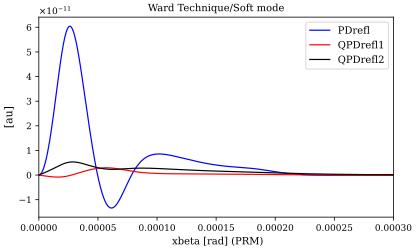

105
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:07.813385


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.41443 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:07.814362
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.369418717828110e-11 max = 6.183486522334470e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


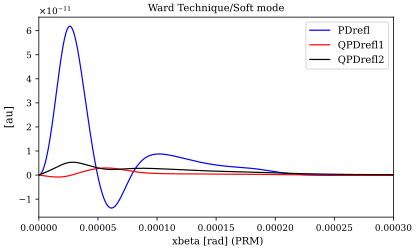

106
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:09.586082


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.65301 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:09.586081
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.399827432194420e-11 max = 6.321738220674151e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


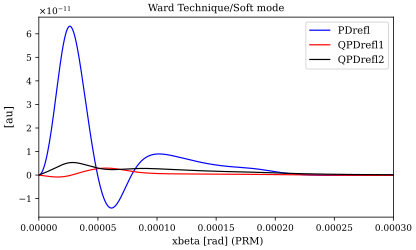

107
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:11.596882


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.40775 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:11.597885
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.429809745564460e-11 max = 6.458064256311750e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


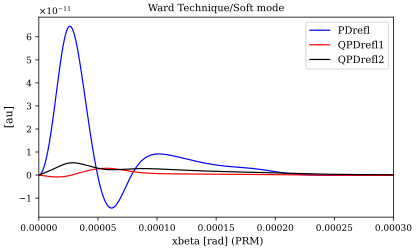

108
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:13.389113


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.48608 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:13.390125
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.459356525035130e-11 max = 6.592423103016210e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


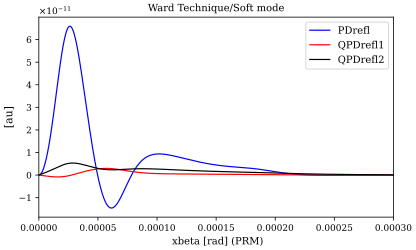

109
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:15.233226


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.55751 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:15.234226
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.488458770371160e-11 max = 6.724773833781250e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


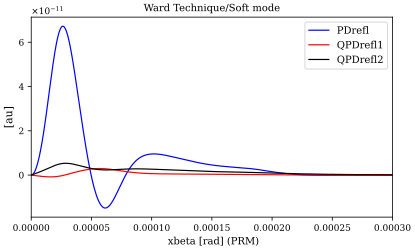

110
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:17.096492


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.55415 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:17.098085
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.517107616746710e-11 max = 6.855076133292180e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


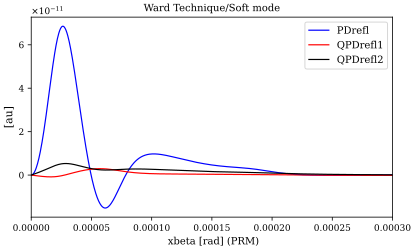

111
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:18.996650


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.54947 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:18.997655
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.545294337445650e-11 max = 6.983290310206301e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


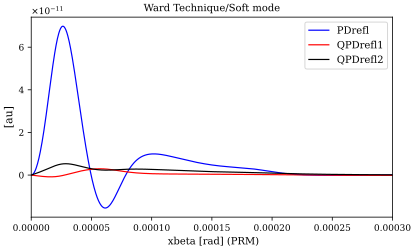

112
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:20.849030


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.52763 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:20.850036
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.573010346519810e-11 max = 7.109377309243270e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


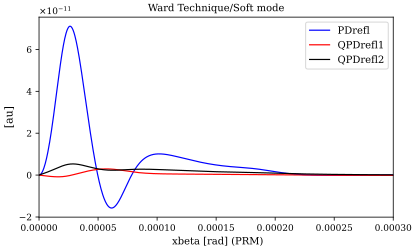

113
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:23.072067


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.77644 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:23.073071
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.600247201404320e-11 max = 7.233298723081760e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


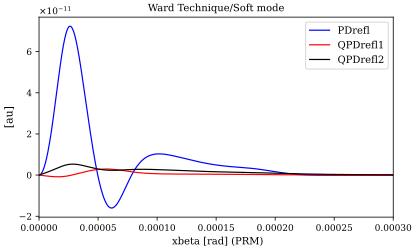

114
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:25.267021


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.96878 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:25.267020
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.626996605489340e-11 max = 7.355016804058660e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


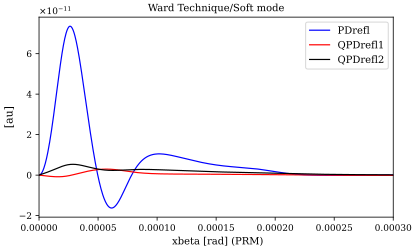

115
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:27.576090


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.70547 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:27.577603
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.653250410647250e-11 max = 7.474494475667400e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


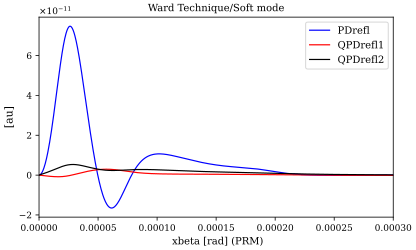

116
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:29.614415


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.71548 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:29.614414
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.679000619714690e-11 max = 7.591695343851800e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


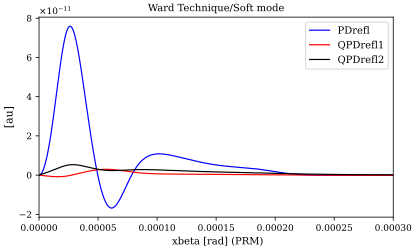

117
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:31.702483


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.63133 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:31.703486
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.704239388928520e-11 max = 7.706583708092050e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


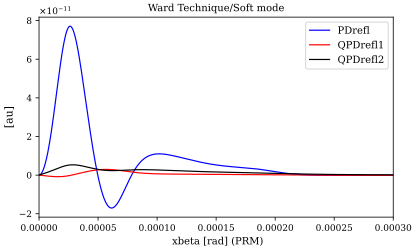

118
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:33.665030


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.59128 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:33.666030
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.728959030315140e-11 max = 7.819124572279470e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


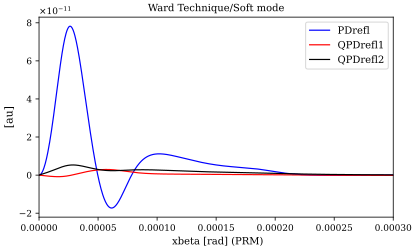

119
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:35.591716


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.746 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:35.591715
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.753152014032330e-11 max = 7.929283655376610e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


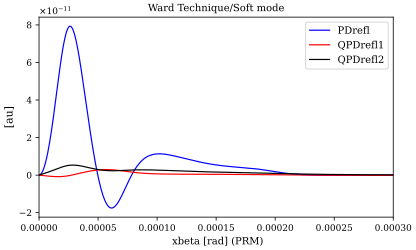

120
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:37.686091


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.78297 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:37.686090
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.776810970662880e-11 max = 8.037027401859631e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


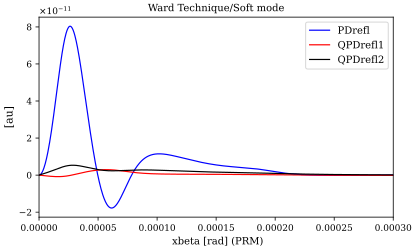

121
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:39.993680


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.80512 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:39.994686
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.799928693459410e-11 max = 8.142322991939610e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


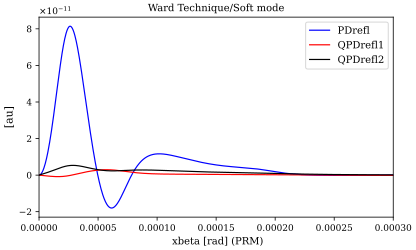

122
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:42.140746


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.54946 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:42.140745
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.822498140539610e-11 max = 8.245138351559790e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


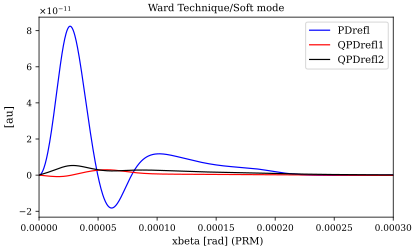

123
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:44.134727


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.45014 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:44.135734
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.844512437031260e-11 max = 8.345442162165630e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


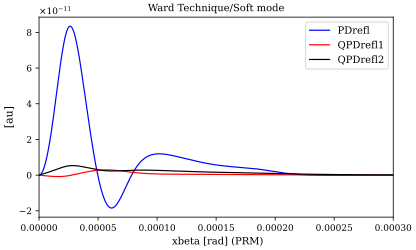

124
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:45.923888


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.56049 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:45.923888
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.865964877166410e-11 max = 8.443203870244770e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


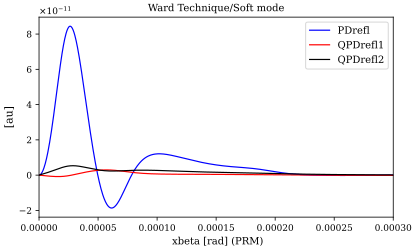

125
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:48.214989


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.46108 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:48.216008
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.886848926323960e-11 max = 8.538393696633880e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


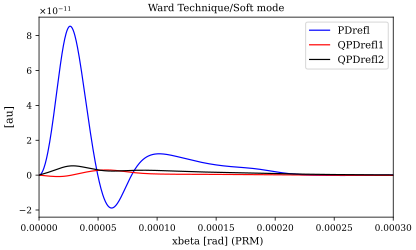

126
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:50.196688


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.49444 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:50.196688
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.907158223020230e-11 max = 8.630982645589720e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


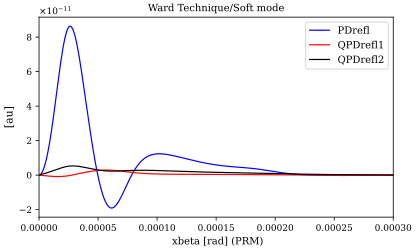

127
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:52.107666


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.74459 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:52.108176
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.926886580846720e-11 max = 8.720942513621500e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


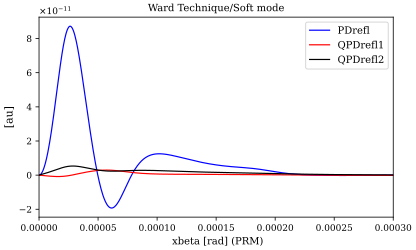

128
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:54.223662


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.55428 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:54.223661
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.946027990354520e-11 max = 8.808245898081961e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


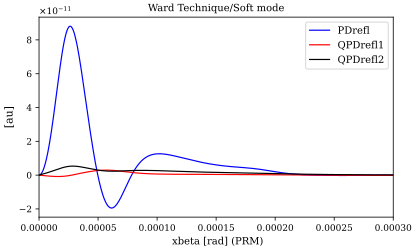

129
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:56.114699


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.53279 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:56.115706
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.964576620884850e-11 max = 8.892866205514480e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


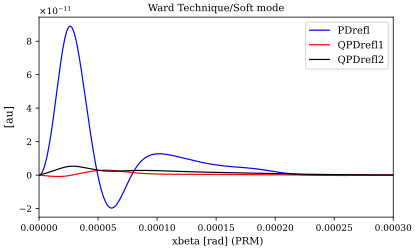

130
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:58.039800


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.59251 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:58.039800
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.982526822345180e-11 max = 8.974777659753670e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


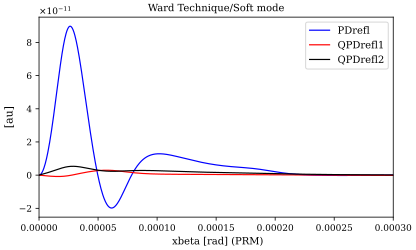

131
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:38:59.997790


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.49628 seconds

--- Output info ---

Run date and time: 2022-10-14 22:38:59.997789
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -1.999873126930260e-11 max = 9.053955309777080e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


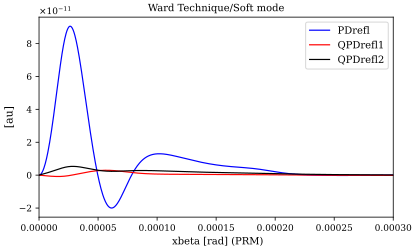

132
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:39:01.852405


100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 1.48638 seconds

--- Output info ---

Run date and time: 2022-10-14 22:39:01.852404
Detectors used: PDrefl, QPDrefl1, QPDrefl2, circ, trans, z

One xaxis used: ['xaxis PRM xbeta lin 0 0.0003 800']
PDrefl   : min = -2.016610250787670e-11 max = 9.130375037305491e-11
QPDrefl1 : min = -8.226866489696990e-13 max = 2.959003641529860e-12
QPDrefl2 : min = 0.000000000000000e+00 max = 5.334528629778050e-12
circ     : min = 3.254055943519230e-01 max = 1.522384460585230e+01
trans    : min = 3.254055943519240e-03 max = 1.522384460585230e-01
z        : min = 0.000000000000000e+00 max = 0.000000000000000e+00


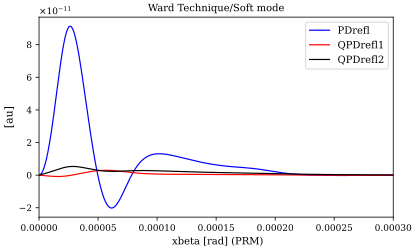

133
--------------------------------------------------------------
Running kat - Started at 2022-10-14 22:39:03.706571


 62% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

In [702]:
i=0
for i in np.arange(0, 180, 1):
    kat4.PDrefl.phase1 = i
    #kat4.sQPD1.gouy = i
    out3 = kat4.run()
    out3.info()
    out3.plot(['QPDrefl1','QPDrefl2','PDrefl'],title='Ward Technique/Soft mode')
    print(i)